El dataset con el que estamos trabajando es de una campaña de marketing telefónica de una institución bancaria. El objetivo es predecir si un cliente suscribirá o no un depósito a plazo (la variable y). Esta información es crucial para el banco, ya que un depósito a plazo es una fuente importante de ingresos y requiere inversión en campañas de marketing.

Descripción de los Atributos del Dataset
Aquí tienes una descripción detallada de cada atributo:

* age: Edad del cliente. (Numérico)

* job: Tipo de empleo del cliente. Las categorías incluyen:

"admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services". (Categórico)
* marital: Estado civil del cliente. Las categorías incluyen:

"married", "divorced" (incluye personas viudas), "single". (Categórico)
*education: Nivel educativo del cliente. Las categorías incluyen:

"unknown", "secondary", "primary", "tertiary". (Categórico)
* default: Indica si el cliente tiene crédito en mora. (Binario: "yes", "no")

* balance: Balance promedio anual del cliente en la cuenta bancaria, en euros. (Numérico)

* housing: Indica si el cliente tiene un préstamo hipotecario. (Binario: "yes", "no")

* loan: Indica si el cliente tiene un préstamo personal. (Binario: "yes", "no")

** Atributos Relacionados con la Última Campaña de Contacto
* contact: Tipo de comunicación utilizada en la última campaña de contacto. Las opciones son:

"unknown", "telephone", "cellular". (Categórico)
* day: Día del mes en que se realizó el último contacto con el cliente. (Numérico)

* month: Mes en que se realizó el último contacto con el cliente. (Categórico: "jan", "feb", "mar", …, "nov", "dec")

* duration: Duración de la última llamada en segundos. (Numérico)

Nota: Esta variable tiene un impacto directo en el objetivo. En general, una mayor duración puede indicar un mayor interés en el producto.
** Otros Atributos
* campaign: Número de contactos realizados durante la campaña para este cliente, incluido el último contacto. (Numérico)

* pdays: Número de días desde el último contacto del cliente en una campaña anterior. (Numérico)

Un valor de -1 indica que el cliente no fue contactado previamente.
* previous: Número de contactos realizados antes de esta campaña para este cliente. (Numérico)

* poutcome: Resultado de la campaña de marketing anterior. Las categorías incluyen:

"unknown", "other", "failure", "success". (Categórico)
* Variable Objetivo
y: Indica si el cliente suscribió un depósito a plazo en esta campaña de marketing. (Binario: "yes", "no")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc,precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
# Cargar el archivo CSV
file_path = 'dataset.csv'
data = pd.read_csv(file_path, sep=';')

In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
print(data.info())

el dataset es completo, ya que no tiene valores faltantes. Además, la mayoría de las columnas están en formato object, lo cual es típico para variables categóricas. Las columnas en int64 son numéricas y pueden ser continuas o discretas, dependiendo de su naturaleza.

In [ ]:
# Verificar datos faltantes
print("\nDatos faltantes por columna:")
print(data.isnull().sum())

In [ ]:
# Estadísticas descriptivas
data.describe()

Estadísticas Descriptivas
count: Número de valores no nulos en cada columna. En este caso, todas las columnas tienen 45211 valores no nulos, lo que confirma que no hay valores faltantes en las columnas numéricas.

mean: La media (promedio) de los valores de cada columna.

std: La desviación estándar, que mide la dispersión de los datos alrededor de la media. Un valor alto indica que los datos están más dispersos.

min: El valor mínimo en cada columna.

25%: El primer cuartil, que representa el valor por debajo del cual se encuentra el 25% de los datos.

50%: La mediana (o segundo cuartil), que es el valor central de los datos. Es el punto donde el 50% de los datos están por debajo y el otro 50% están por encima.

75%: El tercer cuartil, que representa el valor por debajo del cual se encuentra el 75% de los datos.

max: El valor máximo en cada columna.

In [ ]:
print("\nDistribución de la variable objetivo (y):")
print(data['y'].value_counts())

In [ ]:
# Seleccionar solo las columnas numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Histograma y boxplot para cada variable numérica
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')
    
    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

La distribución de la edad tiene un sesgo hacia la derecha, lo que significa que la mayoría de los clientes son relativamente jóvenes o de mediana edad.
La mayor concentración de clientes parece estar en el rango de 30 a 40 años, con un pico significativo en torno a los 30 años.
La frecuencia disminuye a medida que aumenta la edad, especialmente a partir de los 50 años.

In [ ]:
numerical_data = data[numerical_columns]

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

La mayoría de los valores de correlación están cerca de 0, lo que indica que la mayoría de las variables numéricas no tienen una fuerte relación entre sí. Esto significa que estos atributos son, en su mayoría, independientes entre sí en términos de correlación lineal.

In [ ]:
# Seleccionar solo las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Gráfico de barras para cada variable categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribución de la Variable Categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Prueba de normalidad Shapiro-Wilk para cada columna numérica
normality_results = {}
for col in numerical_columns:
    stat, p_value = stats.shapiro(data[col].dropna())
    normality_results[col] = {'Statistic': stat, 'p-value': p_value}

# Mostrar los resultados
normality_df = pd.DataFrame(normality_results).T
print("Resultados de la Prueba de Normalidad Shapiro-Wilk:")
print(normality_df)

# Interpretación de resultados
alpha = 0.05
for col in normality_results:
    if normality_results[col]['p-value'] > alpha:
        print(f"{col}: No se rechaza la hipótesis nula (distribución normal)")
    else:
        print(f"{col}: Se rechaza la hipótesis nula (no sigue una distribución normal)")

Statistic (Estadístico de Shapiro-Wilk):

El estadístico de Shapiro-Wilk es un valor que indica el ajuste de los datos a una distribución normal. Este valor varía entre 0 y 1.
Un valor cercano a 1 indica que los datos se ajustan bien a una distribución normal.
Valores menores indican una menor adecuación de los datos a la normalidad. Sin embargo, por sí solo no es suficiente para rechazar o aceptar la hipótesis de normalidad; para eso se usa el p-value.
p-value (Valor p):

El p-value es el valor de probabilidad asociado a la prueba de hipótesis de normalidad.
La hipótesis nula (H0) en esta prueba es que los datos tienen una distribución normal.
Interpretación del p-value:
Si el p-value es menor que el nivel de significancia (generalmente 0.05), se rechaza la hipótesis nula, indicando que los datos no siguen una distribución normal.
Si el p-value es mayor o igual al nivel de significancia, no se rechaza la hipótesis nula, lo cual sugiere que los datos podrían seguir una distribución normal.

In [ ]:
# Crear gráficos Q-Q para cada variable numérica
for col in numerical_columns:
    plt.figure(figsize=(3, 3))
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {col}')
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles de los Datos')
    plt.grid(True)
    plt.show()

In [ ]:
# Binning de 'age'
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 60, 100], labels=['joven', 'adulto', 'mayor'])


Se utiliza la función pd.cut() de pandas para dividir la variable age en categorías o grupos de edades, y luego asigna una etiqueta (como joven, adulto, mayor) a cada grupo. Aquí está el desglose de cada parámetro:

Explicación de los Parámetros
data['age']: Es la columna que se va a categorizar. En este caso, la columna age contiene la edad de los clientes.

bins=[0, 30, 60, 100]: Define los límites de los intervalos para categorizar las edades. Cada par de números en bins representa un rango que formará un grupo:

[0, 30) agrupa las edades entre 0 y 30 años, sin incluir el 30.
[30, 60) agrupa las edades entre 30 y 60 años, sin incluir el 60.
[60, 100] agrupa las edades entre 60 y 100 años, incluyendo el 100.
labels=['joven', 'adulto', 'mayor']: Asigna una etiqueta a cada intervalo. En este caso:

joven se asignará a los valores de age entre 0 y 30 años.
adulto se asignará a los valores de age entre 30 y 60 años.
mayor se asignará a los valores de age entre 60 y 100 años.
data['age_group']: Crea una nueva columna en el DataFrame llamada age_group que contendrá las etiquetas asignadas a cada cliente según su edad.

In [ ]:
# Log transform en 'balance'
data['log_balance'] = np.log1p(data['balance'])  # np.log1p para evitar log(0)

# Crear interacción entre 'balance' y 'loan'
data['balance_loan_interaction'] = data['balance'] * data['loan'].apply(lambda x: 1 if x == 'yes' else 0)

Un logaritmo es una forma de responder a la pregunta: “¿A qué número debo elevar una base para obtener un cierto valor?”

Ejemplo Básico
Si pensamos en el logaritmo en base 10, que es común en muchos contextos, el logaritmo nos dice cuántas veces tenemos que multiplicar el número 10 para obtener un valor específico.

Por ejemplo:

El logaritmo de 1000 en base 10 es 3, porque 10 elevado a la 3 es igual a 1000 (o sea, 
10
×
10
×
10
=
1000).
De manera similar, el logaritmo de 100 en base 10 es 2, porque 10 elevado a la 2 es igual a 100.
En notación matemática, esto se escribiría como:

log
⁡
10
(
1000
)
=
3
log 
10
​
 (1000)=3
Lo que significa: “El logaritmo en base 10 de 1000 es 3”.

¿Para Qué se Usa?
Simplificar Números Grandes: Los logaritmos se usan para convertir números grandes en números más manejables. Por ejemplo, el logaritmo de un millón (1,000,000) en base 10 es 6, porque 10 elevado a la 6 es 1,000,000.

Modelar Crecimiento y Decadencia: Los logaritmos son útiles para describir procesos donde el crecimiento o la disminución no es lineal, como el crecimiento de poblaciones, la intensidad del sonido, o el crecimiento de una inversión.



Transformación logarítmica:

np.log1p() aplica el logaritmo natural a balance + 1. La expresión log1p(x) es equivalente a log(x + 1).
Esta transformación es útil cuando quieres reducir la escala de los valores y hacer que la distribución sea más simétrica, especialmente si la variable balance está sesgada (por ejemplo, con una larga cola hacia la derecha).

balance_loan_interaction en el DataFrame es una variable de interacción que combina la información del balance (balance) y del estado de préstamo (loan). Aquí se multiplica el balance por un valor binario basado en si el cliente tiene un préstamo personal.

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
# Seleccionar las variables numéricas a transformar con MinMaxScaler, excluyendo age, log_balance, y balance_loan_interaction
numerical_features_to_scale = ['balance', 'duration', 'campaign', 'pdays', 'previous']

# Aplicar Min-Max Scaling solo a las variables seleccionadas
scaler = MinMaxScaler()
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(data[numerical_features_to_scale]), columns=numerical_features_to_scale)

# Reemplazar -inf y NaN en log_balance con el mínimo valor de log_balance sin -inf ni NaN
min_log_balance = data['log_balance'].replace([-np.inf, np.nan], np.nan).min()


# Agregar log_balance y balance_loan_interaction al dataset de variables numéricas transformadas
scaled_numerical_data['log_balance'] = data['log_balance'].replace([-np.inf, np.nan], min_log_balance)
scaled_numerical_data['balance_loan_interaction'] = data['balance_loan_interaction']


¿Por qué NaN y -inf?:

NaN: Cuando balance es tan bajo que balance + 1 da un valor negativo (por ejemplo, para balance = -8019), np.log1p() devuelve NaN porque el logaritmo de un número negativo no está definido.
-inf: Si el valor de balance es -1, entonces balance + 1 es 0, y np.log1p(0) es -inf porque el logaritmo de cero tiende a infinito negativo.

In [ ]:
# Seleccionar variables categóricas, incluyendo age_group
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group']

# Aplicar One-Hot Encoding a las variables categóricas
categorical_data = pd.get_dummies(data[categorical_features], drop_first=True)

get_dummies convierte las variables categóricas en el DataFrame data a una representación numérica "dummy" o "one-hot encoding", lo cual es necesario para que los modelos de machine learning puedan procesarlas correctamente

La multicolinealidad es una situación en la que dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí, lo cual puede causar problemas en el análisis y en la interpretación de los resultados del modelo.

Cuando existe multicolinealidad, significa que algunas variables independientes (predictores) en el modelo aportan información redundante, porque están tan relacionadas entre sí que prácticamente contienen la misma información. Esto puede hacer que el modelo sea menos estable y los coeficientes de las variables independientes menos confiables.

In [ ]:
# Seleccionar la variable objetivo
target = data[['y']]

# Crear el dataset final combinando numéricas, categóricas y la variable objetivo
final_dataset = pd.concat([scaled_numerical_data, categorical_data, target], axis=1)

In [ ]:
final_dataset.info()

In [ ]:
# Ver la distribución de la variable objetivo
print("Distribución de la variable objetivo (y):")
print(data['y'].value_counts())

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = final_dataset.drop(columns=['y'])
y = final_dataset['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir 'yes' a 1 y 'no' a 0 para SMOTE

In [ ]:

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.describe()

In [ ]:
# Aplicar SMOTE solo al conjunto de entrenamiento imputado
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de la clase en el conjunto de entrenamiento balanceado
print("Distribución después de aplicar SMOTE en el conjunto de entrenamiento:")
print(y_train_balanced.value_counts())

SMOTE (Synthetic Minority Over-sampling Technique) es una técnica utilizada para balancear conjuntos de datos desbalanceados mediante la creación de muestras sintéticas de la clase minoritaria. Es especialmente útil en problemas de clasificación donde una de las clases tiene muchas menos observaciones que la otra, lo que puede llevar a que los modelos de machine learning no aprendan correctamente las características de la clase minoritaria.

In [ ]:
# Entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

In [ ]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)


In [ ]:
# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud (Accuracy):", accuracy_score(y_test, y_pred))

matriz se interpreta de la siguiente manera:

Clase 0 (predicciones negativas, probablemente la clase mayoritaria):

* 7078: Verdaderos Negativos (TN): Casos que son realmente de la clase 0 y el modelo los predijo correctamente como clase 0.
* 907: Falsos Positivos (FP): Casos que son realmente de la clase 1, pero el modelo los predijo incorrectamente como clase 0.

Clase 1 (predicciones positivas, probablemente la clase minoritaria):

* 493: Falsos Negativos (FN): Casos que son realmente de la clase 1, pero el modelo los predijo incorrectamente como clase 0.
* 565: Verdaderos Positivos (TP): Casos que son realmente de la clase 1 y el modelo los predijo correctamente como clase 1.


Precision:

* Indica el porcentaje de predicciones positivas que son correctas.
* Para la clase 0, la precisión es de 0.93. Esto significa que el 93% de las veces que el modelo predijo la clase 0, esa predicción fue correcta.
* Para la clase 1, la precisión es de 0.38. Esto significa que el 38% de las veces que el modelo predijo la clase 1, esa predicción fue correcta.

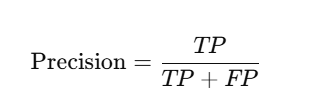


Recall:

* Indica el porcentaje de casos reales de una clase que fueron correctamente identificados.
* Para la clase 0, el recall es de 0.89, lo que significa que el modelo identificó correctamente el 89% de todos los casos reales de clase 0.
* Para la clase 1, el recall es de 0.53, lo que significa que el modelo identificó correctamente el 53% de todos los casos reales de clase 1.

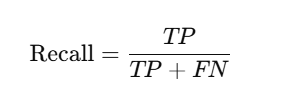


F1-Score:

* Es la media armónica de la precisión y el recall. El F1-score equilibra estas dos métricas y es especialmente útil en conjuntos de datos desbalanceados.
* Para la clase 0, el F1-score es 0.91.
* Para la clase 1, el F1-score es 0.45.


Support:

* Es el número de ocurrencias reales de cada clase en el conjunto de prueba.
* La clase 0 tiene un soporte de 7985 casos, y la clase 1 tiene un soporte de 1058 casos.

In [ ]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(20, 10))

# Graficar el árbol
plot_tree(clf, filled=True, feature_names=X_train_balanced.columns, class_names=['No', 'Yes'], rounded=True, proportion=True)

# Mostrar el gráfico
plt.show()

In [ ]:
# Definir el modelo base
clf = DecisionTreeClassifier(random_state=42)

# Definir los parámetros a evaluar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Ejecutar la búsqueda
grid_search.fit(X_train_balanced, y_train_balanced)

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score:", grid_search.best_score_)

Hiperparámetro

### max_depth:

Controla la profundidad máxima del árbol de decisión.
Valores: [3, 5, 10, None]
3, 5, 10: Limita el árbol a esas profundidades específicas.
None: No limita la profundidad, permitiendo que el árbol crezca hasta que todas las hojas sean puras o hasta que se alcance min_samples_split.
Propósito: Limitar la profundidad puede ayudar a evitar el sobreajuste (overfitting) al reducir la complejidad del árbol.

### min_samples_split:
Define el número mínimo de muestras necesarias para dividir un nodo.
Valores: [2, 5, 10]
2: Permite dividir un nodo si tiene al menos 2 muestras.
5, 10: Requiere al menos 5 o 10 muestras para dividir un nodo.
Propósito: Ayuda a controlar la cantidad de nodos en el árbol. Valores más altos pueden prevenir el sobreajuste al impedir que el modelo cree demasiados nodos en ramas con pocas muestras.

###  min_samples_leaf:
Define el número mínimo de muestras que debe tener una hoja.
Valores: [1, 5, 10]
1: Permite hojas con una sola muestra.
5, 10: Requiere que las hojas tengan al menos 5 o 10 muestras.
Propósito: Ayuda a suavizar el modelo. Establecer un número mínimo más alto evita que el modelo cree hojas para casos aislados, reduciendo el riesgo de sobreajuste.

###  max_features:
Define el número máximo de características a considerar al buscar la mejor división.
Valores: ['auto', 'sqrt', 'log2', None]
'auto': Usa todas las características (en este caso es equivalente a None para DecisionTreeClassifier).
'sqrt': Usa la raíz cuadrada del número total de características.
'log2': Usa el logaritmo en base 2 del número total de características.
None: Usa todas las características disponibles.
Propósito: Limitar el número de características para cada división puede hacer que el modelo sea más robusto y menos propenso a ajustarse demasiado a una sola característica. Este hiperparámetro es especialmente útil para árboles en modelos de conjunto (ensemble) como Random Forest.

### criterion:
Define la métrica que el árbol de decisión utiliza para evaluar la calidad de una división.
Valores: ['gini', 'entropy']
'gini': Utiliza el índice de Gini para medir la "impureza" de las divisiones. Prefiere ramas con clases puras.
'entropy': Utiliza la entropía como criterio de impureza, que proviene de la teoría de la información. Tiende a crear árboles ligeramente más profundos.
Propósito: El criterio afecta la estructura del árbol; ambos son métodos para medir la calidad de una división, aunque producen resultados similares en la mayoría de los casos.

### class_weight:
Ajusta el peso de cada clase para contrarrestar el desbalance de clases.
Valores: [None, 'balanced']
None: No ajusta los pesos; todas las clases tienen el mismo peso.
'balanced': Ajusta automáticamente los pesos de las clases en función de su frecuencia, dándole mayor peso a la clase minoritaria.
Propósito: En problemas de clasificación desbalanceada, establecer class_weight='balanced' ayuda al modelo a prestar más atención a la clase minoritaria, mejorando el rendimiento en esa clase.

In [ ]:
# Definir el modelo de árbol de decisión con los mejores hiperparámetros y max_depth=10
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight=None,
    random_state=42
)



In [ ]:
# Entrenar el modelo
clf.fit(X_train_balanced, y_train_balanced)


In [ ]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud (Accuracy):", accuracy_score(y_test, y_pred))

* En el nuevo modelo, el recall de la clase 1 mejoró, lo que significa que el modelo es mejor identificando los casos positivos de la clase 1. Esto es útil si el objetivo es captar más de esta clase.
* Sin embargo, esto se logró a costa de reducir la precisión y recall de la clase 0 y reducir ligeramente el accuracy general.
* La mejora en el recall de la clase 1 puede ser deseable en escenarios donde es crucial detectar la clase minoritaria, incluso si eso significa un ligero sacrificio en la precisión general.

In [ ]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(20, 10))

# Graficar el árbol
plot_tree(clf, filled=True, feature_names=X_train_balanced.columns, class_names=['No', 'Yes'], rounded=True, proportion=True)

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo de Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

La Curva ROC (Receiver Operating Characteristic) es una herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. 

La curva ROC representa la relación entre dos métricas:

* FPR (False Positive Rate) - Tasa de Falsos Positivos:

Indica la proporción de casos negativos que fueron clasificados incorrectamente como positivos.
Va en el eje X de la gráfica.
Valores bajos de FPR indican que el modelo es bueno para evitar clasificar incorrectamente los casos negativos.

* TPR (True Positive Rate) - Tasa de Verdaderos Positivos o Sensibilidad (también llamado Recall):

Indica la proporción de casos positivos que fueron clasificados correctamente.

Va en el eje Y de la gráfica.
Valores altos de TPR indican que el modelo es bueno para detectar casos positivos.

Interpretación de la Curva ROC

## Línea Diagonal (Línea de Azar):

* La línea diagonal punteada representa un modelo que clasifica aleatoriamente, donde FPR y TPR son iguales.
* Un modelo que cae sobre esta línea no tiene capacidad predictiva y no es mejor que un modelo de predicción aleatoria.

## Curva ROC del Modelo:

* La curva ROC muestra cómo cambian la TPR y la FPR a medida que el umbral de decisión del modelo cambia.
* Un modelo perfecto alcanzaría la esquina superior izquierda (FPR = 0, TPR = 1), ya que esto indica una TPR del 100% y una FPR del 0%.
## Área Bajo la Curva (AUC - Area Under the Curve):
* El valor AUC mide el área bajo la curva ROC.
* AUC varía entre 0 y 1:
* AUC = 1: Modelo perfecto.
* AUC = 0.5: Modelo sin capacidad de discriminación (equivalente a una clasificación aleatoria).
* AUC < 0.5: Indica un modelo peor que uno aleatorio, lo que rara vez sucede.
* En este caso, el AUC es 0.81, lo que indica que el modelo tiene un buen desempeño, ya que 0.81 es significativamente mayor que 0.5.

In [ ]:
# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calcular la curva de precisión-recall y AUC para la clase positiva (y = 1)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la curva de precisión-recall para la clase positiva
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label=f'Clase Positiva (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall para la Clase Positiva')
plt.legend(loc="lower left")
plt.show()


Esta es una Curva de Precisión-Recall para la clase positiva de un modelo de clasificación. Esta curva es útil para evaluar el rendimiento del modelo, especialmente en problemas con clases desbalanceadas.

Interpretación de la Curva de Precisión-Recall
* La curva muestra cómo varían la precisión y el recall a medida que cambia el umbral de decisión del modelo.
* A medida que el recall aumenta (es decir, el modelo identifica más casos positivos correctamente), la precisión tiende a disminuir. Esto ocurre porque, para lograr un mayor recall, el modelo empieza a clasificar más casos como positivos, lo que también puede aumentar los falsos positivos.
* La curva comienza con una alta precisión cuando el recall es bajo, y a medida que se incrementa el recall, la precisión disminuye.


* La curva muestra que el modelo tiene una alta precisión cuando el recall es bajo, pero a medida que intenta capturar más casos positivos (aumentando el recall), la precisión disminuye de manera significativa.
* El Average Precision (AP) de 0.41 sugiere que el modelo tiene un rendimiento moderado en términos de mantener precisión y recall balanceados.